In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
from src.model.deeplabv3 import TrashDetector
from src.data.dataset import TrashDataset

In [47]:
!python -m pip install matplotlib

You should consider upgrading via the '/home/renesat/0. PARA/1. Projects/Ecodrone/NN/.venv/bin/python -m pip install --upgrade pip' command.


In [49]:
from torchvision import transforms
from torchvision.utils import draw_segmentation_masks
import ipyplot
import matplotlib.pyplot as plt
import torch
import cv2
from PIL import Image

In [25]:
transform = preprocess = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [26]:
a = TrashDataset("../data/raw/train-all.csv", "../data/raw/train", transform=transform)

In [27]:
im, mask = a[1]

In [28]:
mask.shape

(1520, 2704)

In [29]:
Image.fromarray((im * mask).numpy().reshape(()))

ValueError: cannot reshape array of size 12330240 into shape ()

TypeError: Invalid shape (3, 1520, 2704) for image data

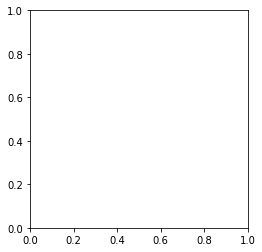

In [50]:
plt.imshow(draw_segmentation_masks((im * 255).type(torch.ByteTensor), torch.Tensor(mask > 0.5).bool(), alpha=0.5))

In [42]:
mask > 0.5

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])